# Generate parameter charts for individual player

In [2]:
import pandas as pd
import numpy as np
import urllib3
from bs4 import BeautifulSoup
import time
from datetime import date, datetime
from selenium import webdriver
import copy
from dateutil import relativedelta
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, ttest_rel, ttest_1samp, levene, bartlett
from glob import glob
import os
from sklearn.linear_model import Lasso, Lars, lars_path, LinearRegression
from sklearn.model_selection import GridSearchCV

In [5]:
# load pre-saved data for individual player
pathname = 'C:/Users/mysel/Dropbox/datascience bootcamp/NBA/csv/'
filenames =  glob(pathname + 'Dwyane*.csv')

In [8]:
# pre-process
filename = filenames[0]
os.chdir(pathname)
df = pd.read_csv(filename,encoding = 'ISO-8859-1')  
df.rename(columns={'\xa0.1':'Win'}, inplace=True)
df['Win'] = [int(df['Win'][i].split()[1][1:-1]) for i in range(len(df['Win']))]
df = df.drop(df[df['PTS']==0].index)

In [75]:
df.columns

Index(['Unnamed: 0', 'Name', 'Event', 'ED', 'Pre/Post', 'Rk', 'Date', 'Offset',
       'Tm', ' ', 'Opp', 'Win', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA',
       '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS', 'GmSc', '+/-', 'ORtg', 'DRtg', 'OR_Team',
       'DR_Team'],
      dtype='object')

In [122]:
# statistical test
features = df.columns[14:-2]
for feature in features:
    print(feature + ', p_value = '+ str(np.round(ttest_ind(df[feature][df['Pre/Post']=='Pre'],df[feature][df['Pre/Post']=='Post'])[1], decimals=3)))

FG, p_value = 0.201
FGA, p_value = 0.468
FG%, p_value = 0.247
3P, p_value = 0.452
3PA, p_value = 0.882
3P%, p_value = nan
FT, p_value = 0.011
FTA, p_value = 0.032
FT%, p_value = nan
ORB, p_value = 0.762
DRB, p_value = 0.902
TRB, p_value = 0.817
AST, p_value = 0.969
STL, p_value = 0.433
BLK, p_value = 0.357
TOV, p_value = 0.217
PF, p_value = 0.261
PTS, p_value = 0.024
GmSc, p_value = 0.04
+/-, p_value = 0.357
ORtg, p_value = 0.364
DRtg, p_value = 0.111


C:\Users\mysel\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\mysel\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\mysel\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


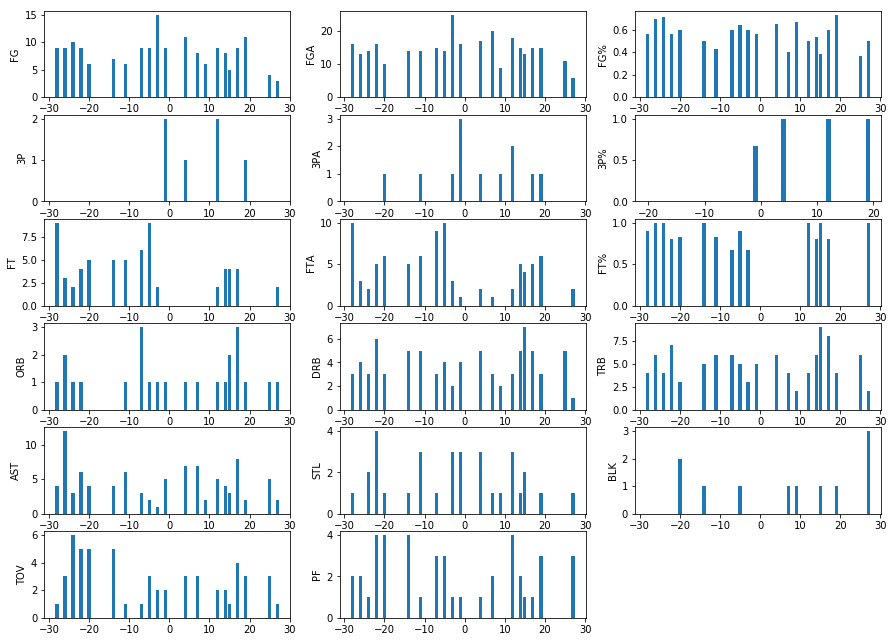

In [36]:
features = df.columns[14:-7]
f, axs = plt.subplots(2,2,figsize=(15,15))
for i in range(len(features)):
    plt.subplot(8,3,i+1)
    plt.bar(df['Offset'],df[features[i]])
    plt.ylabel(features[i])
plt.show()

# Generate Formal figures

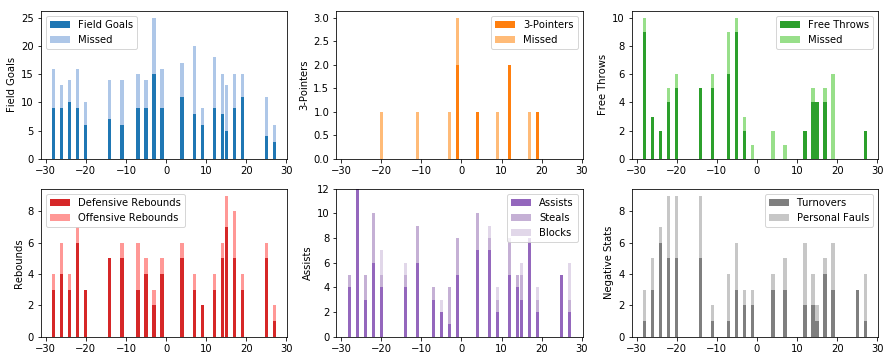

In [74]:
cmap=plt.get_cmap('tab20')
fig, ax = plt.subplots(2,3,figsize=(15,6))
plt.subplot(2,3,1)
p1 = plt.bar(df['Offset'], df['FG'],  color=cmap(0))
p2 = plt.bar(df['Offset'], df['FGA']-df['FG'], bottom=df['FG'],  color=cmap(1))
plt.legend((p1[0], p2[0]), ('Field Goals', 'Missed'))
plt.ylabel('Field Goals')

plt.subplot(2,3,2)
p1 = plt.bar(df['Offset'], df['3P'],  color=cmap(2))
p2 = plt.bar(df['Offset'], df['3PA']-df['3P'], bottom=df['3P'],  color=cmap(3))
plt.legend((p1[0], p2[0]), ('3-Pointers', 'Missed'))
plt.ylabel('3-Pointers')

plt.subplot(2,3,3)
p1 = plt.bar(df['Offset'], df['FT'],  color=cmap(4))
p2 = plt.bar(df['Offset'], df['FTA']-df['FT'], bottom=df['FT'],  color=cmap(5))
plt.legend((p1[0], p2[0]), ('Free Throws', 'Missed'))
plt.ylabel('Free Throws')

plt.subplot(2,3,4)
p1 = plt.bar(df['Offset'], df['DRB'],  color=cmap(6))
p2 = plt.bar(df['Offset'], df['ORB'], bottom=df['DRB'],  color=cmap(7))
plt.legend((p1[0], p2[0]), ('Defensive Rebounds', 'Offensive Rebounds'))
plt.ylabel('Rebounds')

plt.subplot(2,3,5)
p1 = plt.bar(df['Offset'], df['AST'],  color=cmap(8))
p2 = plt.bar(df['Offset'], df['STL'], bottom=df['AST'],  color=cmap(9))
p3 = plt.bar(df['Offset'], df['BLK'], bottom=df['AST']+df['STL'],  color=cmap(9), alpha =0.5)
plt.legend((p1[0], p2[0], p3[0]), ('Assists', 'Steals','Blocks'), loc =1)
plt.ylabel('Assists')

plt.subplot(2,3,6)
p1 = plt.bar(df['Offset'], df['TOV'],  color=cmap(14))
p2 = plt.bar(df['Offset'], df['PF'], bottom=df['TOV'],  color=cmap(15))
plt.legend((p1[0], p2[0]), ('Turnovers', 'Personal Fauls'))
plt.ylabel('Negative Stats')
plt.show()



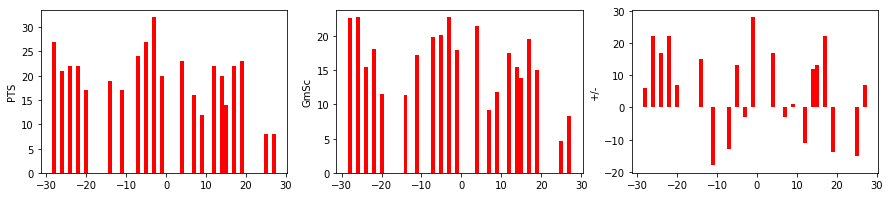

In [131]:
features = df.columns[-7:-4]
f, axs = plt.subplots(1,3,figsize=(15,3))
for i in range(len(features)):
    plt.subplot(1,3,i+1)
    data = df[features[i]]
    idx_pos = [idx for idx in range(len(data)) if data[i]>0]
    idx_neg = [idx for idx in range(len(data)) if data[i]<0]
    
    plt.bar(df['Offset'][idx_pos],data[idx_pos],color ='r',width =1)
    plt.bar(df['Offset'][idx_neg],data[idx_neg],color ='b',width =1)
    #plt.ylim(-np.max(abs(data))-1,np.max(abs(data))+1)
    plt.ylabel(features[i])
plt.show()

In [130]:
idx_neg = [idx for idx in range(len(df[features[i]])) if data[i]<0]

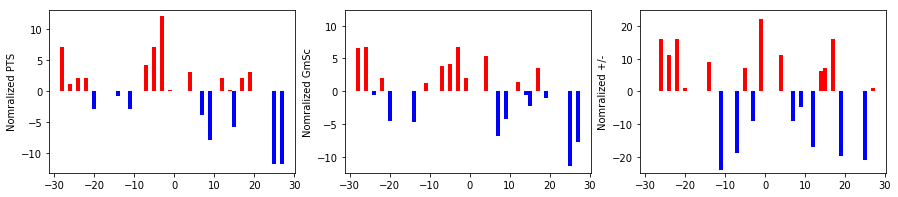

In [125]:
features = df.columns[-7:-4]
f, axs = plt.subplots(1,3,figsize=(15,3))
for i in range(len(features)):
    plt.subplot(1,3,i+1)
    data = df[features[i]]-np.mean(df[features[i]])
    idx_pos = [idx for idx in range(len(df[features[i]])) if df[features[i]][idx]-np.mean(df[features[i]])>0]
    idx_neg = [idx for idx in range(len(df[features[i]])) if df[features[i]][idx]-np.mean(df[features[i]])<0]
    
    plt.bar(df['Offset'][idx_pos],data[idx_pos],color ='r',width =1)
    plt.bar(df['Offset'][idx_neg],data[idx_neg],color ='b',width =1)
    plt.ylim(-np.max(abs(data))-1,np.max(abs(data))+1)
    plt.ylabel('Nomralized '+features[i])
plt.show()